In [1]:
import numpy as np
import matplotlib.pyplot as plt

import os
from os.path import join as join
import sys

module_path = os.path.abspath(os.path.join('..'))

if module_path not in sys.path :
    sys.path.append(module_path)

    
import _ressources.chain as chain
import _ressources.tools as tools
import _ressources.lumenclass as lc
import _ressources.analysis_tools.analysis as an

from scipy.optimize import curve_fit

main_dir = '/Users/mathieuleverge/git/chain_lumen/_data/pumping/osmotic/'


In [2]:
eps = 1e-3
mu = 0.6105653703843762

In [3]:
def plot_osmotic(chis, chiv, path_list, plot_param_list, Nt_list, rescale = False) :
    label = False
    Nt_list[(chis, chiv)] = {}
    for n in range(nsim) :
        Nt_list[(chis, chiv)][n] = np.loadtxt(os.path.join(path_list[(chis, chiv)][n], 'sim_nlum.dat'))
        if label :
            if not rescale :
                plt.plot(Nt_list[(chis, chiv)][n][:, 0], Nt_list[(chis, chiv)][n][:, 1], color=plot_param_list[(chis, chiv)][0], marker=plot_param_list[(chis, chiv)][1], markersize=plot_param_list[(chis, chiv)][2], linewidth=plot_param_list[(chis, chiv)][3], alpha=plot_param_list[(chis, chiv)][4])
            else :
                plt.plot(Nt_list[(chis, chiv)][n][:, 0]*chiv**2, Nt_list[(chis, chiv)][n][:, 1], color=plot_param_list[(chis, chiv)][0], marker=plot_param_list[(chis, chiv)][1], markersize=plot_param_list[(chis, chiv)][2], linewidth=plot_param_list[(chis, chiv)][3], alpha=plot_param_list[(chis, chiv)][4])
        else :
            label = True
            if not rescale :
                plt.plot(Nt_list[(chis, chiv)][n][:, 0], Nt_list[(chis, chiv)][n][:, 1], color=plot_param_list[(chis, chiv)][0], marker=plot_param_list[(chis, chiv)][1], markersize=plot_param_list[(chis, chiv)][2], linewidth=plot_param_list[(chis, chiv)][3], label = r'$\chi_s$ = '+ str(chis) + r' ; $\chi_v = $' + str(chiv), alpha=1.)
            else :
                plt.plot(Nt_list[(chis, chiv)][n][:, 0]*chiv**2, Nt_list[(chis, chiv)][n][:, 1], color=plot_param_list[(chis, chiv)][0], marker=plot_param_list[(chis, chiv)][1], markersize=plot_param_list[(chis, chiv)][2], linewidth=plot_param_list[(chis, chiv)][3], label = r'$\chi_s$ = '+ str(chis) + r' ; $\chi_v = $' + str(chiv), alpha=plot_param_list[(chis, chiv)][4])
    return Nt_list[(chis, chiv)]



In [34]:
ca_dict = {0 : ['ca0', 'k'], 0.001 : ['ca1e-3', 'g'], 0.01 : ['ca1e-2', 'b'], 0.1 : ['ca1e-1', 'r'], 1 : ['ca1e0', 'purple'],10 : ['ca1e1', 'orange']}
# (chis, chiv) : marker, markersize, alpha, linewidth
lw = 1.
ms = 4
chi_dict = {(5, 5) : ['^', ms, 1., lw],
            (50, 50) : ['+', ms, 1., lw],
            (500, 500) : ['o', ms, 1., lw]}
nsim = 21


In [35]:
Nt_N1000 = {}

for chi in chi_dict.keys() :
    subdir = "N1000/chis"+str(chi[0])+"_chiv"+str(chi[1])
    Nt_N1000[chi] = {}
        
    for ca in ca_dict.keys() :
        try :
            Nt_N1000[chi][ca] = {}
            for n in range(nsim) :
                Nt_N1000[chi][ca][n] = np.loadtxt(join(main_dir, subdir, ca_dict[ca][0], 'run'+str(n).zfill(4), 'sim_nlum.dat'))
            print(str(ca) + ' done !')
        except :
            pass
            print(str(ca) + ' not in chis'+str(chi[0])+'_chiv'+str(chi[1]))

       



0 not in chis5_chiv5
0.001 not in chis5_chiv5
0.01 done !
0.1 not in chis5_chiv5
1 not in chis5_chiv5
10 not in chis5_chiv5
0 not in chis50_chiv50
0.001 not in chis50_chiv50
0.01 not in chis50_chiv50
0.1 not in chis50_chiv50
1 not in chis50_chiv50
10 not in chis50_chiv50
0 done !
0.001 not in chis500_chiv500
0.01 not in chis500_chiv500
0.1 done !
1 done !
10 done !


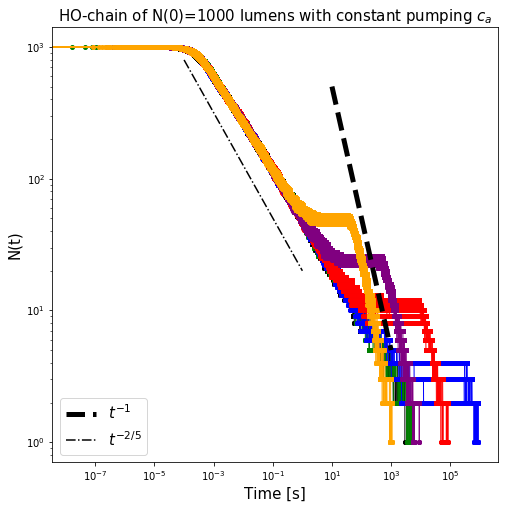

In [6]:
plt.figure(figsize=(8, 8))

plt.xscale('log')
plt.yscale('log')

rescaled = False

#for chi in chi_dict.keys() :
for chi in [(500, 500)] :
    for ca in ca_dict.keys() :
        #if ca != 0 :
        try :
            for n in range(nsim) :
                if rescaled :
                    plt.plot(Nt_N1000[chi][ca][n][:, 0]*chi[0]**2, Nt_N1000[chi][ca][n][:, 1], color = ca_dict[ca][1], marker=chi_dict[chi][0], markersize=chi_dict[chi][1], alpha=chi_dict[chi][2], linewidth=chi_dict[chi][3])
                else :
                    plt.plot(Nt_N1000[chi][ca][n][:, 0], Nt_N1000[chi][ca][n][:, 1], color = ca_dict[ca][1], marker=chi_dict[chi][0], markersize=chi_dict[chi][1], alpha=chi_dict[chi][2], linewidth=chi_dict[chi][3])
        except : 
            pass
        

if rescaled :
    kappa1, alpha1 = 5000., -1
    kappa2, alpha2 = 20., -2./5
    t1 = np.logspace(2, 3, 101)
    t2 = np.logspace(-4, 0, 101)
else :
    kappa1, alpha1 = 5000., -1
    kappa2, alpha2 = 20., -2./5
    t1 = np.logspace(1, 3, 101)
    t2 = np.logspace(-4, 0, 101)

plt.plot(t1, kappa1*t1**alpha1, color='k', linewidth = 5, linestyle='--', label = r'$t^{-1}$')
plt.plot(t2, kappa2*t2**alpha2, color='k', linestyle='-.', label = r'$t^{-2/5}$')

if rescaled :
    plt.xlabel('t/T', fontsize=15)
else :
    plt.xlabel('Time [s]', fontsize=15)
plt.ylabel('N(t)', fontsize=15)
plt.title(r'HO-chain of N(0)=1000 lumens with constant pumping $c_a$', fontsize=15)
plt.legend(fontsize=15, loc=3)
plt.savefig('coarsening_pumping_chis500_chiv500.png', format='png')
plt.show()


In [7]:
def gen_log_times(tmin, tmax, npts) :
    return np.logspace(np.log10(tmin), np.log10(tmax), npts)

def find_argmins(Nt, log_times) :
    index_array = np.zeros(len(log_times), dtype=int)
    for k in range(len(log_times)) :
        index_array[k] = np.argmin(np.abs(log_times[k]-Nt[:, 0]))
    return index_array

def gen_index_array(Nt, npts) :
    size = len(Nt)
    
    tmin = np.min(Nt[1:, 0])   # skip the first time since t=0
    tmax = np.max(Nt[1:, 0])   # skip the first time since t=0
    
    log_times = gen_log_times(tmin, tmax, npts)
    index_array = find_argmins(Nt, log_times)
    
    return index_array


In [36]:

def plot_conf(ca, chis, chiv, Nt, npts=20,  wmin=-6, wmax=3, rescaled=False, rescaled_pumping=False, ell0=10, L0=1, tau=1, show_sim=False) :
    global chi_dict, ca_dict
    chi = (chis, chiv)
    xiv = ell0*chiv
    T = (2*tau*L0*ell0)/((xiv**2)*mu*eps)
    if ca != 0 :
        T_ca = 1./ca
    else :
        print('No pumping!')
        T_ca = 1.
    if show_sim :
        for n in range(nsim) :
            index_array = gen_index_array(Nt[(chis, chiv)][ca][n], npts)
            if rescaled :
                plt.plot(Nt[(chis, chiv)][ca][n][index_array, 0]/T, Nt[(chis, chiv)][ca][n][index_array, 1], color = ca_dict[ca][1], marker=chi_dict[chi][0], markersize=chi_dict[chi][1], alpha = 0.1)
            elif rescaled_pumping :
                plt.plot(Nt[(chis, chiv)][ca][n][index_array, 0]/T_ca, Nt[(chis, chiv)][ca][n][index_array, 1], color = ca_dict[ca][1], marker=chi_dict[chi][0], markersize=chi_dict[chi][1], alpha = 0.1)
            else :
                plt.plot(Nt[(chis, chiv)][ca][n][index_array, 0], Nt[(chis, chiv)][ca][n][index_array, 1], color = ca_dict[ca][1], marker=chi_dict[chi][0], markersize=chi_dict[chi][1], alpha=0.1)

    res_avg, res_std = an.batch(data_dict=Nt[(chis, chiv)][ca], wmin=wmin, wmax=wmax, nwindow=npts)
    if rescaled :
        #plt.plot(res_avg[:, 0]/T, res_avg[:, 1], color = ca_dict[ca][1], marker=chi_dict[chi][0], markersize=chi_dict[chi][1], label = r'$\chi_v = '+str(chiv)+' ; \chi_s = '+str(chis) + ' ; c^a = ' + str(ca) + '$')
        #plt.plot(res_avg[:, 0]/T, res_avg[:, 1], color = ca_dict[ca][1], marker=chi_dict[chi][0], markersize=chi_dict[chi][1], label = r'$\chi_v = '+str(chiv)+'$')
        plt.plot(res_avg[:, 0]/T, res_avg[:, 1], color = ca_dict[ca][1], marker=chi_dict[chi][0], markersize=chi_dict[chi][1], label = r'$c^a = ' + str(ca) + '$')
    elif rescaled_pumping :
        #plt.plot(res_avg[:, 0]/T_ca, res_avg[:, 1], color = ca_dict[ca][1], marker=chi_dict[chi][0], markersize=chi_dict[chi][1], label = r'$\chi_v = '+str(chiv)+' ; \chi_s = '+str(chis) + ' ; c^a = ' + str(ca) + '$')
        #plt.plot(res_avg[:, 0]/T_ca, res_avg[:, 1], color = ca_dict[ca][1], marker=chi_dict[chi][0], markersize=chi_dict[chi][1], label = r'$\chi_v = '+str(chiv)+'$')
        plt.plot(res_avg[:, 0]/T_ca, res_avg[:, 1], color = ca_dict[ca][1], marker=chi_dict[chi][0], markersize=chi_dict[chi][1], label = r'$c^a = ' + str(ca) + '$')
    else :
        #plt.plot(res_avg[:, 0], res_avg[:, 1], color = ca_dict[ca][1], marker=chi_dict[chi][0], markersize=chi_dict[chi][1], label = r'$\chi_v = '+str(chiv)+' ; \chi_s = '+str(chis) + ' ; c^a = ' + str(ca) + '$')
        #plt.plot(res_avg[:, 0], res_avg[:, 1], color = ca_dict[ca][1], marker=chi_dict[chi][0], markersize=chi_dict[chi][1], label = r'$\chi_v = '+str(chiv)+'$')
        plt.plot(res_avg[:, 0], res_avg[:, 1], color = ca_dict[ca][1], marker=chi_dict[chi][0], markersize=chi_dict[chi][1], label = r'$c^a = ' + str(ca) + '$')
    
    #N0=1000      
    #Tf = T*N0**(5./2)
    #plt.vlines(x=1/Tf, ymin=1., ymax=N0, linestyle = '--', color=plot_param_list[(chis, chiv)][0])


def plot_osmotic_pumping(Nt, ca_bools, chi_bools, npts=50, rescaled = False, rescaled_pumping = False, show_sim=False, scaling_laws=True, savefig=False, savename='H0-coarsening_pumping.png', extension='png') :
    plt.figure(figsize=(6, 6))
    plt.xscale('log')
    plt.yscale('log')

    chis5_chiv5, chis50_chiv50, chis500_chiv500 = chi_bools
    ca_0, ca_1e_2, ca_1e_1, ca_1e0, ca_1e1 = ca_bools
    
    # chis, chiv = (5, 5)
    if chis5_chiv5 :
        chis, chiv = 5, 5
        # ca = 0.
        #plot_conf(ca=0., chis=chis, chiv=chiv, Nt=Nt_N1000, npts=npts, wmin=-6, wmax=4, rescaled=rescaled, ell0=10, L0=1, tau=1, show_sim=show_sim)
        # ca = 0.01
        if ca_1e_2 :
            plot_conf(ca=0.01, chis=chis, chiv=chiv, Nt=Nt_N1000, npts=npts, wmin=-6, wmax=6, rescaled=rescaled, rescaled_pumping=rescaled_pumping, ell0=10, L0=1, tau=1, show_sim=show_sim)
        # ca = 0.1
        if ca_1e_1 :
            plot_conf(ca=0.1, chis=chis, chiv=chiv, Nt=Nt_N1000, npts=npts, wmin=-6, wmax=5, rescaled=rescaled, rescaled_pumping=rescaled_pumping, ell0=10, L0=1, tau=1, show_sim=show_sim)
        # ca = 1
        if ca_1e0 :
            plot_conf(ca=1, chis=chis, chiv=chiv, Nt=Nt_N1000, npts=npts, wmin=-6, wmax=4, rescaled=rescaled, rescaled_pumping=rescaled_pumping, ell0=10, L0=1, tau=1, show_sim=show_sim)
        # ca = 10
        if ca_1e1 :
            plot_conf(ca=10, chis=chis, chiv=chiv, Nt=Nt_N1000, npts=npts, wmin=-6, wmax=4, rescaled=rescaled, rescaled_pumping=rescaled_pumping, ell0=10, L0=1, tau=1, show_sim=show_sim)

    # chis, chiv = (50, 50)
    if chis50_chiv50 :
        chis, chiv = 50, 50
        # ca = 0.
        #plot_conf(ca=0., chis=chis, chiv=chiv, Nt=Nt_N1000, npts=npts, wmin=-6, wmax=4, rescaled=rescaled, ell0=10, L0=1, tau=1, show_sim=show_sim)
        # ca = 0.01
        if ca_1e_2 :
            plot_conf(ca=0.01, chis=chis, chiv=chiv, Nt=Nt_N1000, npts=npts, wmin=-6, wmax=6, rescaled=rescaled, rescaled_pumping=rescaled_pumping, ell0=10, L0=1, tau=1, show_sim=show_sim)
        # ca = 0.1
        if ca_1e_1 :
            plot_conf(ca=0.1, chis=chis, chiv=chiv, Nt=Nt_N1000, npts=npts, wmin=-6, wmax=5, rescaled=rescaled, rescaled_pumping=rescaled_pumping, ell0=10, L0=1, tau=1, show_sim=show_sim)
        # ca = 1
        if ca_1e0 :
            plot_conf(ca=1, chis=chis, chiv=chiv, Nt=Nt_N1000, npts=npts, wmin=-6, wmax=4, rescaled=rescaled, rescaled_pumping=rescaled_pumping, ell0=10, L0=1, tau=1, show_sim=show_sim)
        # ca = 10
        if ca_1e1 :
            plot_conf(ca=10, chis=chis, chiv=chiv, Nt=Nt_N1000, npts=npts, wmin=-6, wmax=4, rescaled=rescaled, rescaled_pumping=rescaled_pumping, ell0=10, L0=1, tau=1, show_sim=show_sim)

    # chis, chiv = (500, 500)
    if chis500_chiv500 :
        chis, chiv = 500, 500
        # ca = 0.
        if ca_0 :
            plot_conf(ca=0., chis=chis, chiv=chiv, Nt=Nt_N1000, npts=npts, wmin=-6, wmax=4, rescaled=rescaled, rescaled_pumping=rescaled_pumping, ell0=10, L0=1, tau=1, show_sim=show_sim)
        # ca = 0.01
        if ca_1e_2 :
            plot_conf(ca=0.01, chis=chis, chiv=chiv, Nt=Nt_N1000, npts=npts, wmin=-6, wmax=6, rescaled=rescaled, rescaled_pumping=rescaled_pumping, ell0=10, L0=1, tau=1, show_sim=show_sim)
        # ca = 0.1
        if ca_1e_1 :
            plot_conf(ca=0.1, chis=chis, chiv=chiv, Nt=Nt_N1000, npts=npts, wmin=-6, wmax=5, rescaled=rescaled, rescaled_pumping=rescaled_pumping, ell0=10, L0=1, tau=1, show_sim=show_sim)
        # ca = 1
        if ca_1e0 :
            plot_conf(ca=1, chis=chis, chiv=chiv, Nt=Nt_N1000, npts=npts, wmin=-6, wmax=4, rescaled=rescaled, rescaled_pumping=rescaled_pumping, ell0=10, L0=1, tau=1, show_sim=show_sim)
        # ca = 10
        if ca_1e1 :
            plot_conf(ca=10, chis=chis, chiv=chiv, Nt=Nt_N1000, npts=npts, wmin=-6, wmax=4, rescaled=rescaled, rescaled_pumping=rescaled_pumping, ell0=10, L0=1, tau=1, show_sim=show_sim)

    if scaling_laws :
        coarsening_law = True
        merging_law = True

        if coarsening_law :
            if rescaled :
                k_c, alpha_c = 3000, -2./5
                t_c = np.logspace(0.5, 4, 101)
            else :
                k_c, alpha_c = 20., -2./5
                t_c = np.logspace(-3, 0, 101)
            plt.plot(t_c, k_c*t_c**alpha_c, linestyle='--', color = 'k', linewidth=2, label = r'$t^{-2/5}$')

        if merging_law :
            if rescaled :
                k_m, alpha_m = 200., -1.
                t_m = np.logspace(0, 2, 101)
            else :
                k_m, alpha_m = 50000., -1.
                t_m = np.logspace(1.7, 3.7, 101)
            plt.plot(t_m, k_m*t_m**alpha_m, linestyle='-.', color = 'k', linewidth=2, label = r'$t^{-1}$')

    plt.legend(fontsize=12, loc=3)
    if rescaled :
        plt.xlabel('t / T', fontsize=12)
    elif rescaled_pumping :
        plt.xlabel(r'$t.c^a$', fontsize=12)
    else :
        plt.xlabel(r'$t/\tau_v$', fontsize=12)

    plt.ylabel('N(t)', fontsize=12)
    plt.grid()
    plt.title('HO-chain with active pumping', fontsize=18)
    if savefig :
        plt.savefig(savename, format=extension)
    plt.show()

In [9]:
ca_dict = {0 : ['ca0', 'k'], 0.001 : ['ca1e-3', 'g'], 0.01 : ['ca1e-2', 'b'], 0.1 : ['ca1e-1', 'r'], 1 : ['ca1e0', 'purple'],10 : ['ca1e1', 'orange']}
# (chis, chiv) : marker, markersize, alpha, linewidth
lw = 1.
ms = 6
chi_dict = {(5, 5) : ['^', ms, 1., lw],
            (50, 50) : ['s', ms, 1., lw],
            (500, 500) : ['o', ms, 1., lw]}
nsim = 20


In [10]:
rescaled = False
rescaled_pumping = True

rescaled = True
rescaled_pumping = False

show_sim = False
scaling_laws = True

npts = 40


# Same ratios, different pumpings

End of import !


/usr/local/lib/python3.7/site-packages/numpy/lib/function_base.py:390: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
/usr/local/lib/python3.7/site-packages/numpy/core/_methods.py:154: RuntimeWarning: invalid value encountered in true_divide
  ret, rcount, out=ret, casting='unsafe', subok=False)
/usr/local/lib/python3.7/site-packages/numpy/core/_methods.py:217: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
/usr/local/lib/python3.7/site-packages/numpy/core/_methods.py:186: RuntimeWarning: invalid value encountered in true_divide
  arrmean, rcount, out=arrmean, casting='unsafe', subok=False)
/usr/local/lib/python3.7/site-packages/numpy/core/_methods.py:207: RuntimeWarning: invalid value encountered in true_divide
  ret, rcount, out=ret, casting='unsafe', subok=False)
/Users/mathieuleverge/git/chain_lumen/_ressources/analysis_tools/analysis.py:147: RuntimeWarning: Mean of empty slice
  tavg = np.nanmean([Lavg[j][0] for j in range(len(Lavg))])
/Users/mat

End of import !
End of import !
End of import !


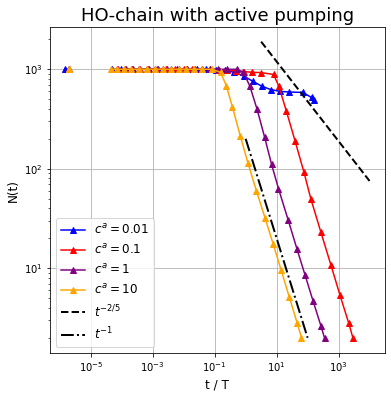

In [11]:
ca_0 = 1
ca_1e_2 = 1
ca_1e_1 = 1
ca_1e0 = 1
ca_1e1 = 1

chis5_chiv5 = 1
chis50_chiv50 = 0
chis500_chiv500 = 0

chi_bools = [chis5_chiv5, chis50_chiv50, chis500_chiv500]
ca_bools = [ca_0, ca_1e_2, ca_1e_1, ca_1e0, ca_1e1]

plot_osmotic_pumping(Nt=Nt_N1000, 
                     ca_bools=ca_bools, 
                     chi_bools=chi_bools, 
                     npts=npts, rescaled = rescaled, 
                     rescaled_pumping=rescaled_pumping, 
                     show_sim=show_sim, 
                     scaling_laws=scaling_laws)


End of import !
End of import !
End of import !
End of import !


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


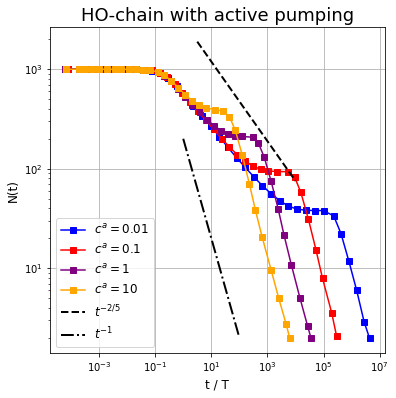

In [12]:
ca_0 = 1
ca_1e_2 = 1
ca_1e_1 = 1
ca_1e0 = 1
ca_1e1 = 1

chis5_chiv5 = 0
chis50_chiv50 = 1
chis500_chiv500 = 0

chis, chiv = 50, 50
savename = '/Users/mathieuleverge/Documents/cavidoc/hydroosmotic/HO-chain_chis'+str(chis)+'_chiv'+str(chiv)+'_T-rescaled.eps'
savefig = True

chi_bools = [chis5_chiv5, chis50_chiv50, chis500_chiv500]
ca_bools = [ca_0, ca_1e_2, ca_1e_1, ca_1e0, ca_1e1]

plot_osmotic_pumping(Nt=Nt_N1000, 
                     ca_bools=ca_bools, 
                     chi_bools=chi_bools, 
                     npts=npts, rescaled = rescaled, 
                     rescaled_pumping=rescaled_pumping, 
                     show_sim=show_sim, 
                     scaling_laws=scaling_laws, 
                     savename=savename, savefig=savefig,
                     extension='eps')


No pumping!
End of import !
End of import !
End of import !
End of import !
End of import !


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


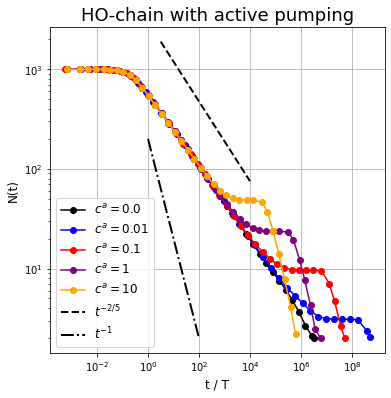

In [13]:
ca_0 = 1
ca_1e_2 = 1
ca_1e_1 = 1
ca_1e0 = 1
ca_1e1 = 1

chis5_chiv5 = 0
chis50_chiv50 = 0
chis500_chiv500 = 1

chis, chiv = 500, 500

chi_bools = [chis5_chiv5, chis50_chiv50, chis500_chiv500]
ca_bools = [ca_0, ca_1e_2, ca_1e_1, ca_1e0, ca_1e1]

savename = '/Users/mathieuleverge/Documents/cavidoc/hydroosmotic/HO-chain_chis'+str(chis)+'_chiv'+str(chiv)+'_T-rescaled.eps'
savefig = True

plot_osmotic_pumping(Nt=Nt_N1000, 
                     ca_bools=ca_bools, 
                     chi_bools=chi_bools, 
                     npts=npts, rescaled = rescaled, 
                     rescaled_pumping=rescaled_pumping, 
                     show_sim=show_sim, 
                     scaling_laws=scaling_laws, 
                     savename=savename, savefig=savefig,
                     extension='eps')


# Same pumping, different ratios

End of import !
End of import !
End of import !


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


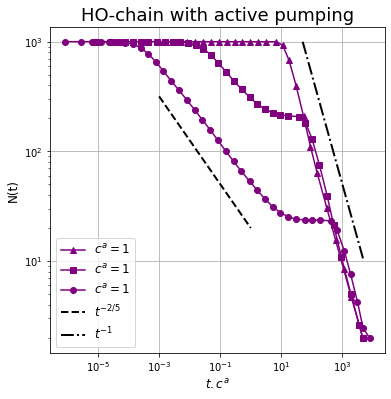

In [14]:
ca_0 = 0
ca_1e_2 = 0
ca_1e_1 = 0
ca_1e0 = 1
ca_1e1 = 0

chis5_chiv5 = 1
chis50_chiv50 = 1
chis500_chiv500 = 1

chi_bools = [chis5_chiv5, chis50_chiv50, chis500_chiv500]
ca_bools = [ca_0, ca_1e_2, ca_1e_1, ca_1e0, ca_1e1]

rescaled = False
rescaled_pumping = True

savename = '/Users/mathieuleverge/Documents/cavidoc/hydroosmotic/HO-chain_ca'+str(1)+'_ca-rescaled.eps'
savefig = True

plot_osmotic_pumping(Nt=Nt_N1000, 
                     ca_bools=ca_bools, 
                     chi_bools=chi_bools, 
                     npts=npts, rescaled = rescaled, 
                     rescaled_pumping=rescaled_pumping, 
                     show_sim=show_sim, 
                     scaling_laws=scaling_laws, 
                     savename=savename, savefig=savefig,
                     extension='eps')


End of import !
End of import !
End of import !


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


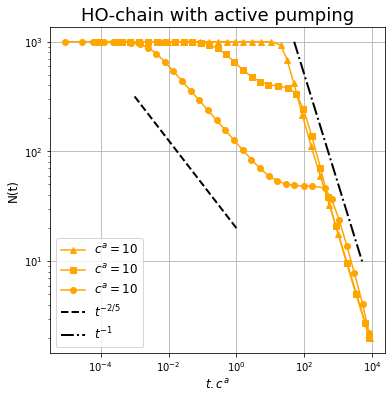

In [15]:
ca_0 = 0
ca_1e_2 = 0
ca_1e_1 = 0
ca_1e0 = 0
ca_1e1 = 1

chis5_chiv5 = 1
chis50_chiv50 = 1
chis500_chiv500 = 1

chi_bools = [chis5_chiv5, chis50_chiv50, chis500_chiv500]
ca_bools = [ca_0, ca_1e_2, ca_1e_1, ca_1e0, ca_1e1]



savename = '/Users/mathieuleverge/Documents/cavidoc/hydroosmotic/HO-chain_ca'+str(10)+'_ca-rescaled.eps'
savefig = True

plot_osmotic_pumping(Nt=Nt_N1000, 
                     ca_bools=ca_bools, 
                     chi_bools=chi_bools, 
                     npts=npts, rescaled = rescaled, 
                     rescaled_pumping=rescaled_pumping, 
                     show_sim=show_sim, 
                     scaling_laws=scaling_laws, 
                     savename=savename, savefig=savefig,
                     extension='eps')


In [37]:
def find_tstep(time_list, t0) :
    return np.argmin(np.abs(time_list - t0))

def calc_avg_distrib(X_dict, Y_dict) :
    X_array = np.array([X_dict[k] for k in X_dict.keys()])
    X_avg = np.average(X_array, axis=0)

    Y_array = np.array([Y_dict[k] for k in Y_dict.keys()])
    Y_avg = np.average(Y_array, axis=0)
    return X_avg, Y_avg



def make_T_dict(folder, npts, nsim=20, log_tmin=-3, log_tmax=7) :
    time_plot_list = np.logspace(log_tmin, log_tmax, npts)
    T_dict = {}
    for k in [20] :
    #for k in range(nsim) :
        T_dict[k] = np.loadtxt(os.path.join(folder, 'run'+str(k).zfill(4)+'/distrib_length.dat'), usecols=0)
    return T_dict, time_plot_list

def make_step_dict(T_dict, time_plot_list, npts, nsim) :
    step_dict = {}
    for n in range(npts) :
        step_dict[n] = {}
        #for k in range(nsim) :
        for k in [20] :
            step_dict[n][k] = np.argmin(np.abs(T_dict[k] - time_plot_list[n]))
    return step_dict

def plot_distrib(step, nsim, folder, T_dict, time_plot_list, step_dict, Nt, show_hist=True, savefig=False, savename='pic.png', rescaled=True, extension='png') :
    L = []
    N = []
    C = []
    
    fig, ax = plt.subplots(1, 3, figsize=(15, 5))
    
    ax[2].set_xscale('log')
    ax[2].set_yscale('log')
    
    ax[0].set_xlim(0.1, 1.80)
    ax[0].set_ylim(0., 1.)
    
    ax[1].set_ylim(0., 1.)
    ax[1].set_xlim(0., 2.)
    
    
    for k in T_dict.keys() :
    #for k in range(nsim) :
        if 1 :
        #try :
            len_sim = len(T_dict[k])       # Length of the sim k
            step_sim = step_dict[step][k]     # Corresponding step for k
            data_L = np.genfromtxt(os.path.join(folder, 'run'+str(k).zfill(4)+'/distrib_length.dat'), skip_header=step_sim, skip_footer=len_sim-step_sim-1)
            data_N = np.genfromtxt(os.path.join(folder, 'run'+str(k).zfill(4)+'/distrib_nion.dat'), skip_header=step_sim, skip_footer=len_sim-step_sim-1)
            t_sim_L, lengths_sim = data_L[0], data_L[1:]
            t_sim_N, nion_sim = data_N[0], data_N[1:]
            concentration_sim = nion_sim/lengths_sim**2 - 1.
            #print(data)

            new_bins = np.max([10, int(np.log10(len(lengths_sim)))*10])

            #print(len(lengths_sim), bins, new_bins)

            L += [lengths_sim]
            N += [nion_sim]
            C += [concentration_sim]
            weights_L = np.ones_like(lengths_sim)/float(len(lengths_sim))
            weights_N = np.ones_like(nion_sim)/float(len(nion_sim))
            weights_C = np.ones_like(concentration_sim)/float(len(concentration_sim))
            if show_hist :
                ax[0].hist(lengths_sim/np.average(lengths_sim), bins=new_bins, label=t_sim_L, alpha=0.1, weights=weights_L)
                ax[1].hist(nion_sim/np.average(nion_sim), bins=new_bins, label=t_sim_N, alpha=0.1, weights=weights_N)
                #ax[1].hist(concentration_sim/np.average(concentration_sim), bins=new_bins, label=t_sim_N, alpha=0.1, weights=weights_C)
            ax[2].plot(Nt[k][:, 0], Nt[k][:, 1])
            
            # print the current state on the log-log plot of N(t)
            s = np.argmin(np.abs(Nt[k][:,0]-t_sim_L))
            ax[2].scatter(Nt[k][s, 0], Nt[k][s, 1])
            
        #except :
        #    pass
        
    new_L = np.concatenate([L[n] for n in range(len(L))])
    new_N = np.concatenate([N[n] for n in range(len(N))])
    new_C = np.concatenate([C[n] for n in range(len(C))])
    
    weights_L = np.ones_like(new_L)/float(len(new_L))
    weights_N = np.ones_like(new_N)/float(len(new_N))
    weights_C = np.ones_like(new_C)/float(len(new_C))
    
    y_L, x_L = np.histogram(new_L, bins=new_bins, weights=weights_L)
    y_N, x_N = np.histogram(new_N, bins=new_bins, weights=weights_N)
    y_C, x_C = np.histogram(new_C, bins=new_bins, weights=weights_C)
    
    new_x_L = 0.5*(x_L[1:]+x_L[:-1])
    new_x_N = 0.5*(x_N[1:]+x_N[:-1])
    new_x_C = 0.5*(x_C[1:]+x_C[:-1])
    
    ax[0].plot(new_x_L/np.average(new_L), y_L, color = 'k')
    ax[1].plot(new_x_N/np.average(new_N), y_N, color = 'k')
    #ax[1].plot(new_x_C/np.average(new_C), y_C, color = 'k')
    
    if rescaled :
        ax[0].set_xlabel(r'$L/\bar{L}$', fontsize=12)
        ax[1].set_xlabel(r'$N/\bar{N}$', fontsize=12)
        #ax[1].set_xlabel(r'$\delta C/c_0$', fontsize=12)
    else :
        ax[0].set_xlabel(r'$L$', fontsize=12)
        ax[1].set_xlabel(r'$N$', fontsize=12)
        #ax[1].set_xlabel(r'$\delta C$', fontsize=12)
    ax[0].set_ylabel(r'$\phi_L(t)/N(t)$', fontsize=12)
    ax[1].set_ylabel(r'$\phi_N(t)/N(t)$', fontsize=12)
    #ax[1].set_ylabel(r'$\phi_C(t)/N(t)$', fontsize=12)
    
    ax[2].set_xlabel(r'Time [s]', fontsize=12)
    ax[2].set_ylabel(r'$N(t)$', fontsize=12)
    
    plt.suptitle('t = '+"{:2.2e}".format(time_plot_list[step]), fontsize=20)
    if savefig :
        plt.savefig(savename, format = extension)
        plt.close()
    else :
        plt.show()

In [57]:
npts = 101
nsim = 1
subdir = 'N1000/chis500_chiv500/ca0/'
folder = os.path.join(main_dir, subdir)

T_dict, time_plot_list = make_T_dict(folder = folder, npts=npts, nsim=nsim, log_tmin=-7, log_tmax=2)
step_dict = make_step_dict(T_dict, time_plot_list, npts, nsim)

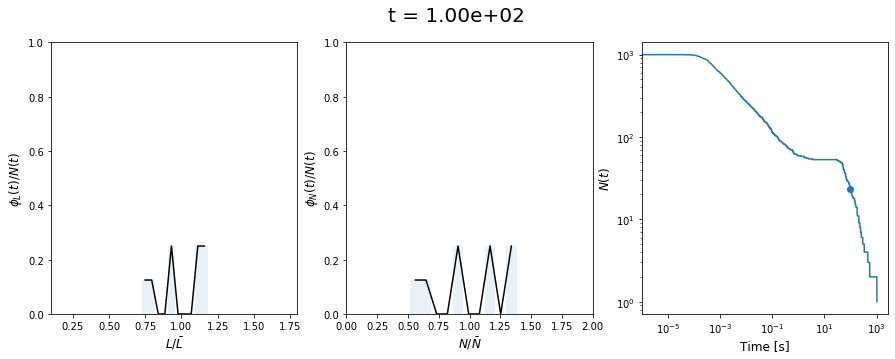

In [58]:
step=100
show_hist = True

n=0
folder = os.path.join(main_dir, subdir)
savename = os.path.join(folder, 'pic'+str(n).zfill(4)+'.png')

chiv, chis = 500, 500
ca = 10

plot_distrib(step=step, nsim=nsim, folder=folder, T_dict=T_dict, time_plot_list=time_plot_list, step_dict=step_dict, Nt=Nt_N1000[(chiv, chis)][ca], show_hist=show_hist, savefig=False, savename=savename, rescaled=True)




In [43]:
Nt_N1000[(500, 500)][0][20]

array([[0.00000000e+00, 1.00000000e+03],
       [6.99680218e-07, 1.00000000e+03],
       [9.22877347e-07, 1.00000000e+03],
       ...,
       [4.04826555e+03, 2.00000000e+00],
       [4.04826562e+03, 1.00000000e+00],
       [4.04830262e+03, 1.00000000e+00]])

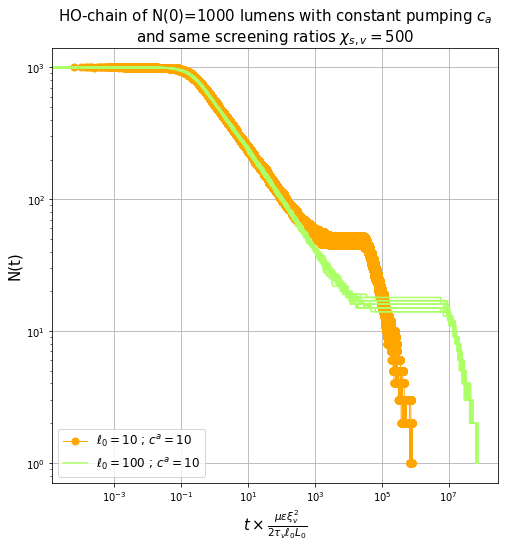

In [18]:
plt.figure(figsize=(8, 8))

plt.xscale('log')
plt.yscale('log')

rescaled = True

L0 = 1.
ell0 = 10
tau = 1.

#for chi in chi_dict.keys() :
for chi in [(500, 500)] :
    #for ca in ca_dict.keys() :
    xiv = chi[1]*ell0
    
    T = (2*tau*ell0*L0)/(mu*eps*xiv**2)
    for ca in [10] :
        #if ca != 0 :
        try :
            for n in range(nsim) :
                label = None
                if n == 0 : label = r'$\ell_0 = $'+ str(ell0) + r' ; $c^a = $'+ str(ca)
                if rescaled :
                    plt.plot(Nt_N1000[chi][ca][n][:, 0]/T, Nt_N1000[chi][ca][n][:, 1], color = ca_dict[ca][1], marker=chi_dict[chi][0], markersize=chi_dict[chi][1], alpha=chi_dict[chi][2], linewidth=chi_dict[chi][3], label=label)
                else :
                    plt.plot(Nt_N1000[chi][ca][n][:, 0], Nt_N1000[chi][ca][n][:, 1], color = ca_dict[ca][1], marker=chi_dict[chi][0], markersize=chi_dict[chi][1], alpha=chi_dict[chi][2], linewidth=chi_dict[chi][3], label=label)
        except : 
            pass


Nt_N1000_ell100 = {}
chiv = 500
ell0 = 100

xiv =(ell0*chiv)
T = (2*tau*ell0*L0)/(mu*eps*xiv**2)

for i in range(nsim) :
    label = None
    if i == 0 : label = r'$\ell_0 = $'+ str(ell0) + r' ; $c^a = 10$'
    Nt_N1000_ell100[i] = np.loadtxt(os.path.join(main_dir, 'N1000/ell100/run'+str(i).zfill(4)+'/sim_nlum.dat'))
    if rescaled :
        plt.plot(Nt_N1000_ell100[i][:, 0]/T, Nt_N1000_ell100[i][:, 1], color='#ADFF68', label=label)
    else :
        plt.plot(Nt_N1000_ell100[i][:, 0], Nt_N1000_ell100[i][:, 1], color='#ADFF68', label=label)

if rescaled :
    kappa1, alpha1 = 5000., -1
    kappa2, alpha2 = 20., -2./5
    t1 = np.logspace(2, 3, 101)
    t2 = np.logspace(-4, 0, 101)
else :
    kappa1, alpha1 = 5000., -1
    kappa2, alpha2 = 20., -2./5
    t1 = np.logspace(1, 3, 101)
    t2 = np.logspace(-4, 0, 101)

#plt.plot(t1, kappa1*t1**alpha1, color='k', linewidth = 5, linestyle='--', label = r'$t^{-1}$')
#plt.plot(t2, kappa2*t2**alpha2, color='k', linestyle='-.', label = r'$t^{-2/5}$')

if rescaled :
    plt.xlabel(r'$t \times \frac{\mu \epsilon \xi_v^2}{2 \tau_v \ell_0 L_0}$', fontsize=15)
else :
    plt.xlabel('Time [s]', fontsize=15)
plt.ylabel('N(t)', fontsize=15)
plt.title(r'HO-chain of N(0)=1000 lumens with constant pumping $c_a$' + '\n' + r'and same screening ratios $\chi_{s, v} = 500$', fontsize=15)
plt.legend(fontsize=12, loc=3)
plt.grid()

if rescaled :
    1
    #plt.savefig('coarsening_pumping_chis500_chiv500_rescaled.png', format='png')
else :
    1
    #plt.savefig('coarsening_pumping_chis500_chiv500.png', format='png')

plt.show()

